# Classification Predict

### Climate change tweet classsification 

This notebook is aimed at classifying if a person/custumer believe in climate change or not, this is to help companies with determining if customising their product for lessining carbon footprint and environmental impact, is a good idea or not.

## Importing the modules

In [1]:
from comet_ml import Experiment

In [2]:
experiment = Experiment(api_key='jOPX4ya8LjBTfsqRhitiRrIUo', project_name="ea6", workspace="phaks323")


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/phaks323/ea6/eee7854f4e98462b97fce4be0466a2fe



Start by importing packages that will be needed

In [3]:
import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

# set plot style
sns.set()

import warnings
warnings.filterwarnings('ignore')

Checking the fields of our data

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_with_no_labels.csv')

## Getting an idea of the data on hand

In [5]:
train_df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [6]:
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


Check the number of rows and columns

In [7]:
train_df.shape

(15819, 3)

Check the data types contained on our data


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Checking if we have null/ empty fields 

In [9]:
train_df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Checking the numberof time each sentiment appears

In [10]:
train_df['sentiment'].value_counts()


 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

## Natural language processing

Construct a function which will clean our text or tweets

In [11]:
import string
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nlppreprocess import NLP
nlp = NLP()

from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

def clean(tweet):
    #remove mentions
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet) 
    
    #remove hashtag
    tweet = re.sub(r'#', '', tweet) 
    
    #remove RT
    tweet = re.sub (r'RT[\s]+', '', tweet)
    
    #remove hyper link
    tweet = re.sub(r'https?:\/\/\S', '', tweet) 
    
    #turning the tweet to lowercase 
    tweet = tweet.lower() 
    
    #Removing the punctuations
    tweet = ''.join([l for l in tweet if l not in string.punctuation])
    
    #Tokenise the tweet
    tokeniser = TreebankWordTokenizer()
    tweet = tokeniser.tokenize(tweet)
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tweet = ' '.join(lemmatizer.lemmatize(word) for word in tweet)   
    
    #remove stop words
    stopwords = NLP(replace_words=True, remove_stopwords=True, 
                            remove_numbers=True, remove_punctuations=False) 
    tweet = stopwords.process(tweet)
    
    return tweet

train_df['message1'] = train_df['message'].apply(clean)
train_df.head(11)

,sentiment,message,tweetid,message1
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief not think carbon dioxid...
1,1,It's not like we lack evidence of anthropogeni...,126103,not like we lack evidence anthropogenic global...
2,2,RT @RawStory: Researchers say we have three ye...,698562,researcher say we three year act climate chang...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,todayinmaker wired wa pivotal year in war cli...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,and racist sexist climate change denying bigo...
5,1,Worth a read whether you do or don't believe i...,425577,worth read whether you not believe in climate ...
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933,mike penny doesn’t believe in global warming s...
7,1,RT @makeandmendlife: Six big things we can ALL...,992717,six big thing we can today fight climate chang...
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510,my yo nephew inconsolable want die old age lik...
9,1,RT @paigetweedy: no offense… but like… how do ...,260471,no offense… but like… how you just not believe...


## Text to numeric

Since the model only recognise numeric data for predictions, the text data has to be converted to numeric data type and this is achieved using text frequency - inverse document frequency (TF-IDF).

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
#TF-IDF for coverting text to numeric data type
data = train_df['message1']

vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
X_vectorized = vectorizer.fit_transform(data)

In [14]:
# Arranging the data into predictor variables and label
X = X_vectorized
y = train_df['sentiment']

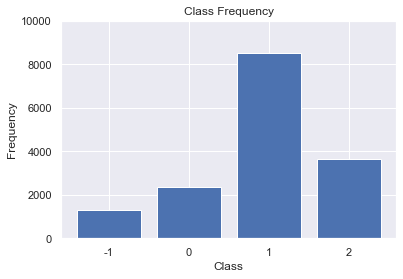

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [15]:
unique, counts = np.unique(y, return_counts=True)
plt.bar(unique, counts)


plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[-1,0,1,2], labels=[-1,0,1,2])
plt.ylim(top=10000)

plt.show()
y.value_counts()

## Models

Spliting the training data into test and training, or test and validation sets

In [16]:
from sklearn.model_selection import train_test_split

# Splitting the training data into 80% training and 20% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
from imblearn.combine import SMOTETomek

In [ ]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek()
X_res,y_res=smk.fit_resample(X_train,y_train)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression


model1 = LogisticRegression(C = 10,random_state = 12)
#model = DecisionTreeClassifier(max_depth = 2)
model1 = SVC(kernel = 'linear', C = 1)
#model2 = KNeighborsClassifier(n_neighbors = 1)
#model3 = MultinomialNB(1)

ovr = OneVsOneClassifier(model1)
ovr.fit(X_train, y_train)

pred = ovr.predict(X_test)


In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#print(confusion_matrix(y_test,yhat))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.7357774968394437
              precision    recall  f1-score   support

          -1       0.74      0.37      0.49       278
           0       0.58      0.40      0.47       425
           1       0.75      0.87      0.81      1755
           2       0.77      0.74      0.75       706

    accuracy                           0.74      3164
   macro avg       0.71      0.60      0.63      3164
weighted avg       0.73      0.74      0.72      3164



Different models will be compared in this section of the notebook

In [26]:
# Create dictionaries for the data we want to log 
params = {"random_state": 7,
          "model_type": "logreg", 
          "scaler": "standard scaler", 
          "param_grid": str(accuracy_score(y_test,pred)),
          "stratify": True } 
metrics = {"f1": accuracy_score(y_test,pred),
           "recall": accuracy_score(y_test,pred),
           "precision": accuracy_score(y_test,pred) }

In [27]:
experiment.log_parameters(params) 
experiment.log_metrics(metrics)

In [28]:
experiment.end()

In [29]:
experiment.display()

In [15]:
# logistic regression for multi-class classification using a one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
# define dataset
# define model
model = LogisticRegression()
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X_train, y_train)
# make predictions
yhat = ovr.predict(X_test)

In [16]:
len(y_train)

12655

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#print(confusion_matrix(y_test,yhat))
print(accuracy_score(y_test,yhat))
print(classification_report(y_test,yhat))

0.7164981036662452
              precision    recall  f1-score   support

          -1       0.89      0.21      0.34       278
           0       0.67      0.30      0.41       425
           1       0.71      0.91      0.80      1755
           2       0.75      0.68      0.71       706

    accuracy                           0.72      3164
   macro avg       0.75      0.53      0.57      3164
weighted avg       0.73      0.72      0.69      3164



In [18]:
# logistic regression for multi-class classification using built-in one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# define dataset
# define model
model1 = LogisticRegression(multi_class='ovr')
# fit model
model1.fit(X_train, y_train)
# make predictions
yhat3 = model1.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(confusion_matrix(y_test,yhat3))
print(accuracy_score(y_test,yhat3))
print(classification_report(y_test,yhat3))

[[  59   29  175   15]
 [   3  128  269   25]
 [   2   33 1601  119]
 [   2    2  223  479]]
0.7164981036662452
              precision    recall  f1-score   support

          -1       0.89      0.21      0.34       278
           0       0.67      0.30      0.41       425
           1       0.71      0.91      0.80      1755
           2       0.75      0.68      0.71       706

    accuracy                           0.72      3164
   macro avg       0.75      0.53      0.57      3164
weighted avg       0.73      0.72      0.69      3164



In [20]:

# SVM for multi-class classification using built-in one-vs-one
from sklearn.datasets import make_classification
from sklearn.svm import SVC
# define dataset
# define model
model2 = SVC(decision_function_shape='ovo')
# fit model
model2.fit(X_train, y_train)
# make predictions
yhat1 = model2.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(confusion_matrix(y_test,yhat1))
print(accuracy_score(y_test,yhat1))
print(classification_report(y_test,yhat1))

[[  62   12  194   10]
 [   3  104  300   18]
 [   1   15 1651   88]
 [   1    1  218  486]]
0.7278761061946902
              precision    recall  f1-score   support

          -1       0.93      0.22      0.36       278
           0       0.79      0.24      0.37       425
           1       0.70      0.94      0.80      1755
           2       0.81      0.69      0.74       706

    accuracy                           0.73      3164
   macro avg       0.80      0.52      0.57      3164
weighted avg       0.75      0.73      0.69      3164



In [22]:

# SVM for multi-class classification using one-vs-one
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
# define dataset
# define model
model3 = SVC()
# define ovo strategy
ovo = OneVsOneClassifier(model3)
# fit model
ovo.fit(X_train, y_train)
# make predictions
yhat2 = ovo.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(confusion_matrix(y_test,yhat2))
print(accuracy_score(y_test,yhat2))
print(classification_report(y_test,yhat2))

[[  61   12  195   10]
 [   3  104  301   17]
 [   1   15 1651   88]
 [   1    1  218  486]]
0.7275600505689002
              precision    recall  f1-score   support

          -1       0.92      0.22      0.35       278
           0       0.79      0.24      0.37       425
           1       0.70      0.94      0.80      1755
           2       0.81      0.69      0.74       706

    accuracy                           0.73      3164
   macro avg       0.80      0.52      0.57      3164
weighted avg       0.75      0.73      0.69      3164



#### Logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
#creating an instance
lr = LogisticRegression()

In [26]:
lr.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = lr.predict(X_test)

In [44]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  72   37  156   13]
 [   6  144  248   27]
 [   5   37 1591  122]
 [   3    4  202  497]]
0.7281921618204804
              precision    recall  f1-score   support

          -1       0.84      0.26      0.40       278
           0       0.65      0.34      0.45       425
           1       0.72      0.91      0.81      1755
           2       0.75      0.70      0.73       706

    accuracy                           0.73      3164
   macro avg       0.74      0.55      0.59      3164
weighted avg       0.73      0.73      0.70      3164



## Testing data

In this section the model  will be applied on the testing data (unseen) to make predictions 

Checking the state of the testing data. Start with checking the number of columns and raws

In [29]:
test_df.shape

(10546, 2)

Check the data types on the testing data

In [30]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


Check if there are any null/empty fields 

In [31]:
test_df.isnull().sum()

message    0
tweetid    0
dtype: int64

Now clean the testing data in the same way the training data was cleaned

In [17]:
test_df['message1'] = test_df['message'].apply(clean)
test_df.head()

,message,tweetid,message1
0,Europe will now be looking to China to make su...,169760,europe will now looking china make sure not al...
1,Combine this with the polling of staffers re c...,35326,combine with polling staffer re climate change...
2,"The scary, unimpeachable evidence that climate...",224985,scary unimpeachable evidence climate change al...
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263,putin got you too jill trump not believe in cl...
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,female orgasm cause global warming sarcastic r...


Convert the cleaned data into a numeric data

In [18]:
# TF-IDF for text to numeric
test_data = test_df['message1']

vectorized_t = vectorizer.transform(test_data)
X_test_t = vectorized_t

In [19]:
y_test_pred = ovr.predict(X_test_t)

In [21]:
len(y_test_pred)

10546

## Saving the predictions

Tunning the predictions into a dataframe

In [21]:
submission = pd.DataFrame({'tweetid':test_df['tweetid'],
                          'sentiment':y_test_pred})

copying the predictions into a CSV file

In [22]:
submission.to_csv('classification2.csv',index=False)

Use the above saved CSV file on Kaggle for submission

## Saving the model

In [ ]:
import pickle
model_save_path = "lr2.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(lr,file)